### 구글 API 사용 전 pip install 필수

In [ ]:
! pip install -U googlemaps

### 구글 API활용, 출발지, 목적지 (위도, 경도) 불러오기

In [3]:
import googlemaps

def getLoc(addr):
    gmaps = googlemaps.Client(key='Google API key')  
    geocode_result = gmaps.geocode(addr)   
    n_lat = geocode_result[0]['geometry']['location']['lat']
    n_lng = geocode_result[0]['geometry']['location']['lng']
    loc = {'lat':n_lat, 'lng':n_lng}
    return loc

start_point= getLoc(input('출발지를 입력해주세요: '))
print(start_point)

destination = getLoc(input('목적지를 입력해주세요: '))
print(destination)

sta_lat_lon = (start_point['lat'], start_point['lng'])
print('출발지(위도, 경도): ', sta_lat_lon)

des_lat_lon = (destination['lat'], destination['lng'])
print('목적지(위도, 경도): ', des_lat_lon)

출발지를 입력해주세요: 서울 강남구 봉은사로82길 13(멋쟁이사자처럼)
{'lat': 37.5123889, 'lng': 127.0551286}
목적지를 입력해주세요: 선릉역
{'lat': 37.504487, 'lng': 127.048957}
출발지(위도, 경도):  (37.5123889, 127.0551286)
목적지(위도, 경도):  (37.504487, 127.048957)


### 출발지 기준으로 1500m 간격으로 bbox를 생성

In [5]:
import osmnx as ox

# (위도, 경도) 중심점으로 일정 간격(dist)으로 bbox를 형성한다.
bbox = ox.utils_geo.bbox_from_point(sta_lat_lon, dist=1500, 
                                    project_utm=False, return_crs=False)

print(bbox)

(37.52587870503239, 37.498899094967605, 127.07213494915175, 127.03812225084826)


### 생성된 bbox를 기준으로 그래프 나타내기

C:\Users\USER\anaconda3\envs\ox\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\USER\anaconda3\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\USER\anaconda3\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


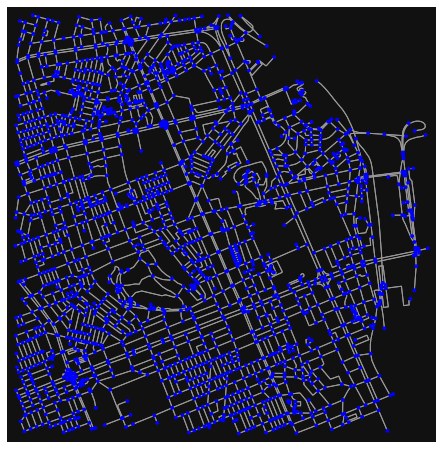

In [6]:
# bbox를 기준으로 그래프 그리기
G = ox.graph.graph_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3], 
                            network_type='walk', 
                            simplify=True, 
                            retain_all=False, 
                            truncate_by_edge=False, 
                            clean_periphery=True, 
                            custom_filter=None)

fig, ax = ox.plot_graph(G, node_color='b')

### 경도, 위도로 노드 ID 찾기

In [ ]:
import osmnx as ox

# 출발지 노드 ID
sta_node = ox.distance.nearest_nodes(G, sta_lat_lon[1], sta_lat_lon[0], 
                          return_dist=False)

# 목적지 노드 ID
des_node = ox.distance.nearest_nodes(G, des_lat_lon[1], des_lat_lon[0], 
                          return_dist=False)

print(sta_node)
print(des_node)

### 학습으로 얻은 경로 리스트(노드ID)를 위도, 경도로 재가공

In [9]:
route_node = [2048463002, 4183907896, 2048462928, 355063399, 917142516, 4183907778, 4183907780, 
              4183907761, 917142533, 765870482, 2280678849, 733859260, 2280678848, 872558180, 
              872558227, 872558285, 860338551]


path_lat_lon = []
for node in route_node:
    path_lat_lon.append([G.nodes[node]['y'], G.nodes[node]['x']])
    
path_lat_lon

[[37.5016094, 127.058258],
 [37.5012636, 127.0573275],
 [37.5018223, 127.0570229],
 [37.5024598, 127.0567001],
 [37.5031314, 127.0563777],
 [37.5036332, 127.0562717],
 [37.5039517, 127.0562026],
 [37.5042787, 127.0561258],
 [37.5049298, 127.0558227],
 [37.5054331, 127.0573198],
 [37.5067233, 127.0566608],
 [37.5069402, 127.0565359],
 [37.5064628, 127.0549768],
 [37.5068918, 127.0547311],
 [37.50724, 127.0545244],
 [37.5066284, 127.0524859],
 [37.5069777, 127.0523129]]

In [7]:
G.nodes[2048463002]

{'y': 37.5016094, 'x': 127.058258, 'street_count': 4}

### 지도에 출발 / 목적지 설정을 위한 함수

In [11]:
def find_start(lat_lon_result):
    return lat_lon_result[0]

def find_goal(lat_lon_result):
    return lat_lon_result[-1]

### 지도로 나타내기(주피터 버전)

In [12]:
import folium

# 출발지 정보 및 도착지 변수 생성
start_point = find_start(path_lat_lon) # 경로 재가공 리스트가 들어감
destination = find_goal(path_lat_lon)

# 지도 변수 만들기
m=folium.Map(location=start_point, zoom_start=14) 

# 마커 표시하기
# add_to() 함수를 이용해 미리 만들어둔 변수에 내용을 추가할 수 있음
folium.Marker(start_point,
           popup='Start_Point / 출발지',
          tooltip='Start_Point / 출발지').add_to(m)

folium.Marker(destination,
             popup='Destination / 도착지',
            tooltip='Destination / 도착지').add_to(m)

# 선으로 경로 표시하기
folium.PolyLine(locations=location_data,tooltip='Polyline').add_to(m)


# 지도 출력
m

### 지도로 나타내기(VSCode 버전) - html파일이용, 브라우저에 띄우기

In [ ]:
import folium

# 출발지 정보 및 도착지 변수 생성
start_point = find_start(location_data) # 실제 구현시 결과값 리스트가 들어갈 것
destination = find_goal(location_data)

# 지도 변수 만들기
m=folium.Map(location=start_point, zoom_start=14) 

# 마커 표시하기
# add_to() 함수를 이용해 미리 만들어둔 변수에 내용을 추가할 수 있음
folium.Marker(start_point,
              popup='Start_Point / 출발지',
              tooltip='Start_Point / 출발지').add_to(m)

folium.Marker(destination,
              popup='Destination / 도착지',
              tooltip='Destination / 도착지').add_to(m)

# 선으로 경로 표시하기
folium.PolyLine(locations=location_data,tooltip='Polyline').add_to(m)

# 경로를 포함하는 지역을 사각형으로 그리기
# 바운더리 확인용
#folium.Rectangle(bounds=location_data,tooltip='Rectangle').add_to(m)

# 지도를 html 파일로 저장
m.save('folium_test.html')

# 지도를 웹브라우저에 띄움
import webbrowser
# file:/// 다음부터 디렉토리에 맞게 설정하면 됨
url = 'file:///C:/Python/folium_test.html' # html파일은 파이썬 코드 저장되는 폴더에 저장됨
webbrowser.open(url)